In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [14]:
oni = pd.read_csv("oni.csv")
oni.head()

,Year,DJF,JFM,FMA,MAM,AMJ,MJJ,JJA,JAS,ASO,SON,OND,NDJ
0,2010,1.5,1.3,0.9,0.4,-0.1,-0.6,-1.0,-1.4,-1.6,-1.7,-1.7,-1.6
1,2011,-1.4,-1.1,-0.8,-0.6,-0.5,-0.4,-0.5,-0.7,-0.9,-1.1,-1.1,-1.0
2,2012,-0.8,-0.6,-0.5,-0.4,-0.2,0.1,0.3,0.3,0.3,0.2,0.0,-0.2
3,2013,-0.4,-0.3,-0.2,-0.2,-0.3,-0.3,-0.4,-0.4,-0.3,-0.2,-0.2,-0.3
4,2014,-0.4,-0.4,-0.2,0.1,0.3,0.2,0.1,0.0,0.2,0.4,0.6,0.7


In [48]:
columns = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
oni_mod = pd.DataFrame(data = {0:0}, index=[0])
for y in oni['Year'].unique():
    row = oni.loc[oni['Year']==y]
    row = row.drop('Year', axis=1)
    row.columns = columns
    df = row
    df.columns = [x+'-'+str(y) for x in row.columns]
    df.index = [0]
    oni_mod = oni_mod.join(df)
oni_mod.head()


,0,01-2010,02-2010,03-2010,04-2010,05-2010,06-2010,07-2010,08-2010,09-2010,...,03-2020,04-2020,05-2020,06-2020,07-2020,08-2020,09-2020,10-2020,11-2020,12-2020
0,0,1.5,1.3,0.9,0.4,-0.1,-0.6,-1.0,-1.4,-1.6,...,0.5,0.3,0.0,-0.2,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
oni_trans = oni_mod.transpose()
oni_trans = oni_trans.drop(0, axis=0)
oni_trans['date'] = pd.to_datetime(oni_trans.index)
oni_trans.columns = ['oni', 'date']
oni_trans

,oni,date
01-2010,1.5,2010-01-01
02-2010,1.3,2010-02-01
03-2010,0.9,2010-03-01
04-2010,0.4,2010-04-01
05-2010,-0.1,2010-05-01
...,...,...
08-2020,NaN,2020-08-01
09-2020,NaN,2020-09-01
10-2020,NaN,2020-10-01
11-2020,NaN,2020-11-01


Text(0.5, 1.0, 'Oceanic Niño Index (ONI)')

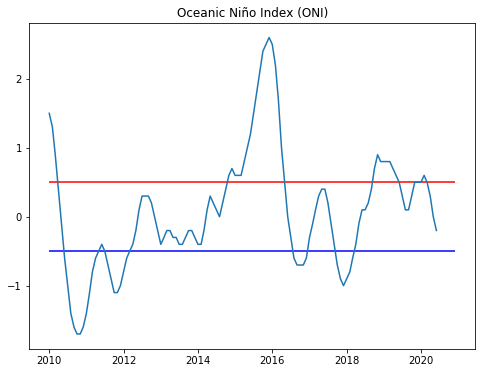

In [56]:
plt.figure(figsize=(8,6))
plt.plot(oni_trans['date'], oni_trans['oni'])
plt.hlines(0.5, '2010-01-01', '2020-12-01', color='red')
plt.hlines(-0.5, '2010-01-01', '2020-12-01', color='blue')
plt.title("Oceanic Niño Index (ONI)")